In [1]:
#step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Step 2:
df = pd.read_csv('penguins_size.csv')

Univariate Analysis


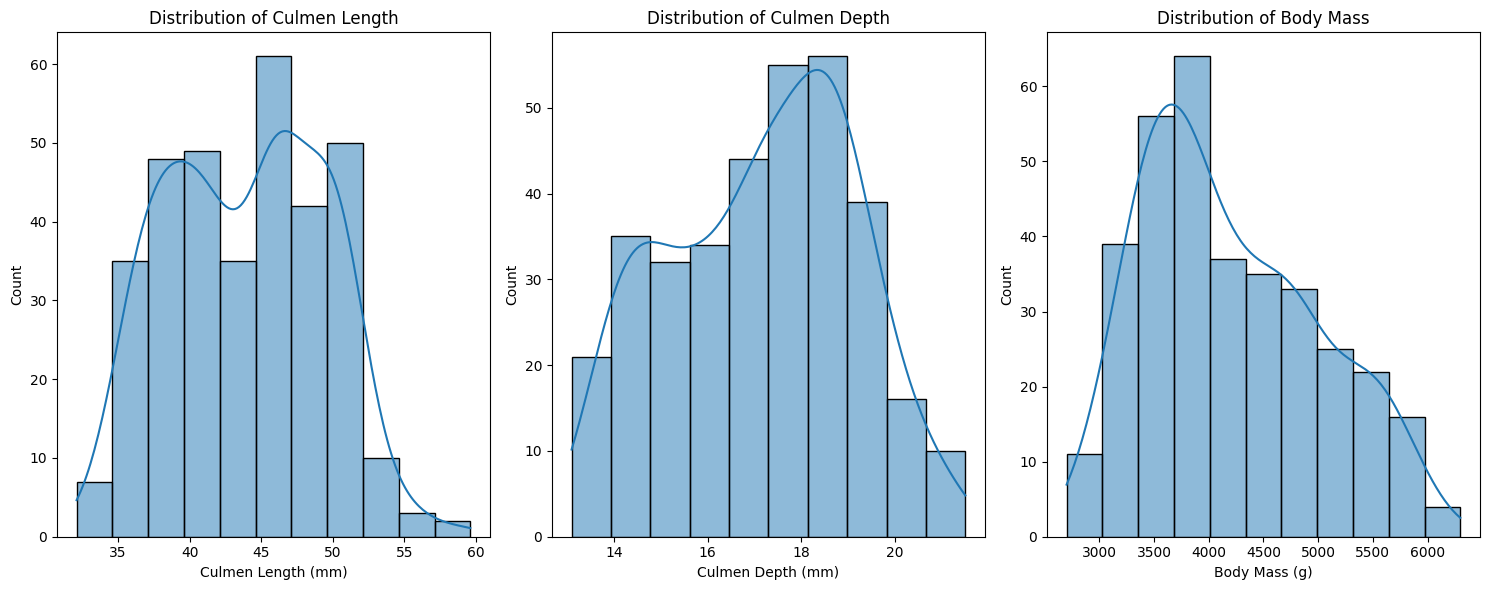

In [4]:
# Step 3:
# Univariate Analysis

print("Univariate Analysis")
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['culmen_length_mm'], kde=True)
plt.title('Distribution of Culmen Length')
plt.xlabel('Culmen Length (mm)')

plt.subplot(1, 3, 2)
sns.histplot(df['culmen_depth_mm'], kde=True)
plt.title('Distribution of Culmen Depth')
plt.xlabel('Culmen Depth (mm)')

plt.subplot(1, 3, 3)
sns.histplot(df['body_mass_g'], kde=True)
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')

plt.tight_layout()
plt.show()

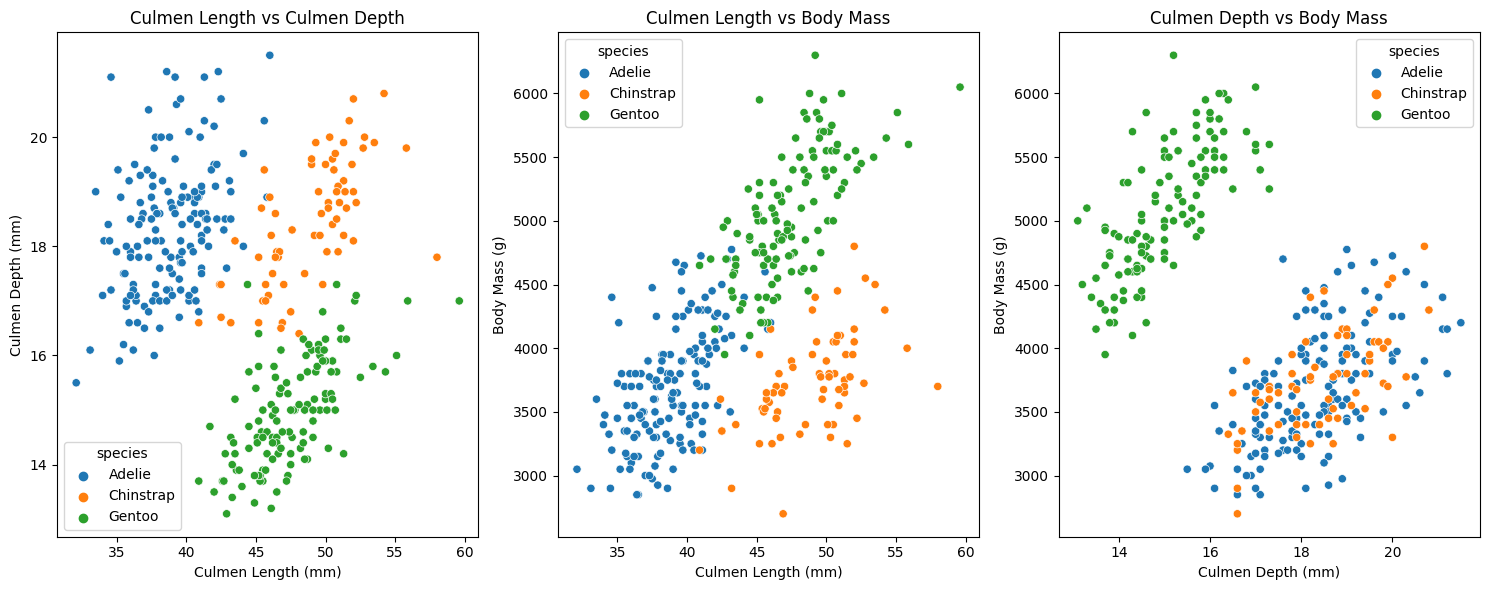

In [5]:
# Bivariate Analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species')
plt.title('Culmen Length vs Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', data=df, hue='species')
plt.title('Culmen Length vs Body Mass')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')

plt.subplot(1, 3, 3)
sns.scatterplot(x='culmen_depth_mm', y='body_mass_g', data=df, hue='species')
plt.title('Culmen Depth vs Body Mass')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Body Mass (g)')

plt.tight_layout()
plt.show()

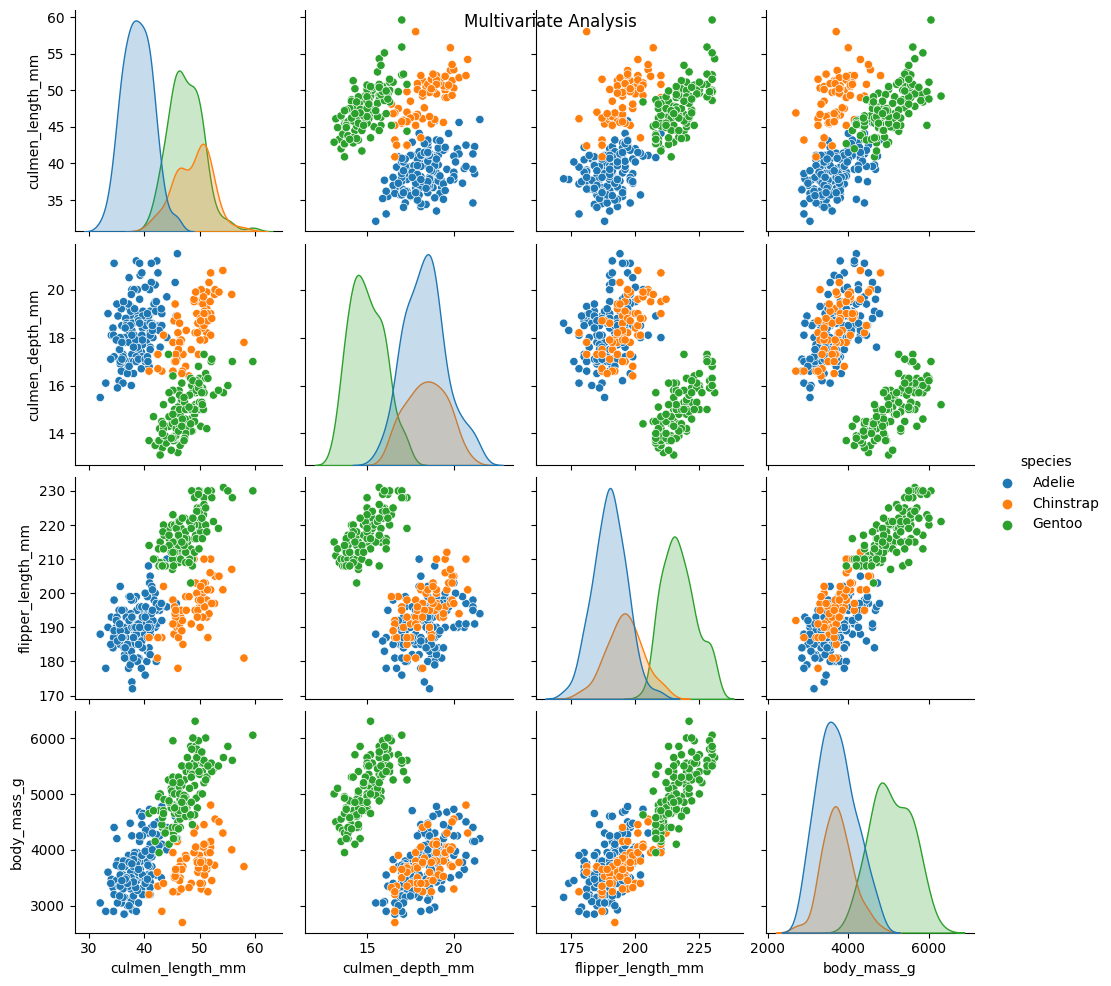

In [6]:
# Multivariate Analysis (pairplot)
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Multivariate Analysis')
plt.show()

In [7]:
#step 4 :
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
# Step 5:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [10]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [11]:
df['sex'].mode()

0    MALE
Name: sex, dtype: object

In [12]:
df['sex'].fillna(df['sex'].mode(), inplace=True)

In [13]:
# Step 6: Find and Replace Outliers (using IQR method)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers for numeric columns individually
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3fb989d630>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3fb989db70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3fb989d390>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3fc0adf5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3fc0cd3160>],
 'means': []}

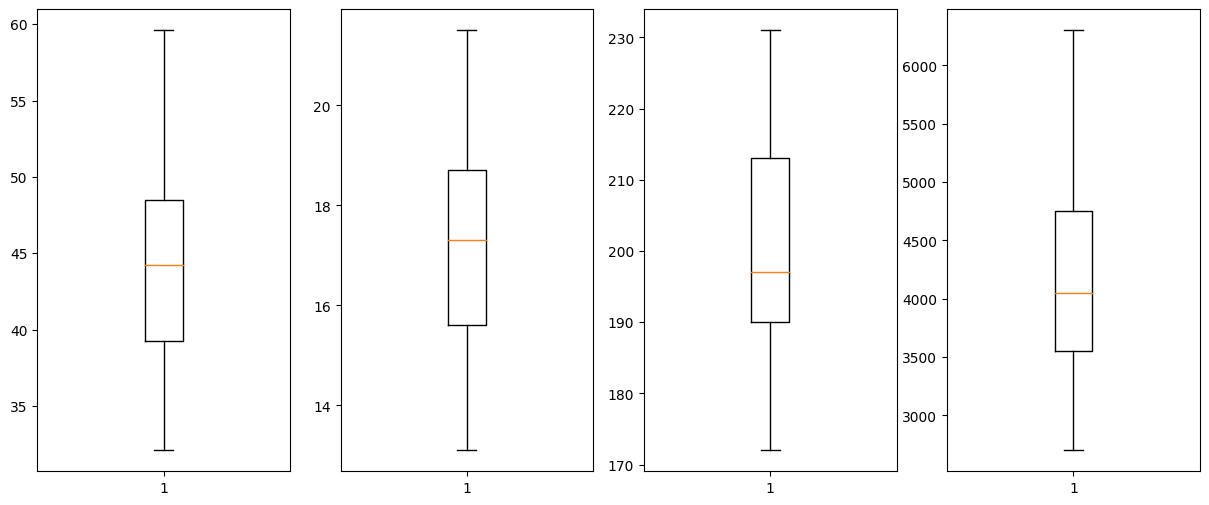

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
plt.boxplot(df.culmen_length_mm)
plt.subplot(1, 4, 2)
plt.boxplot(df.culmen_depth_mm)
plt.subplot(1, 4, 3)
plt.boxplot(df.flipper_length_mm)
plt.subplot(1, 4, 4)
plt.boxplot(df.body_mass_g)

In [15]:
# Step 7:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1=df
df1['species'] = label_encoder.fit_transform(df['species'])
corr = df1.corr(method='pearson')
sorted_mat = corr.unstack().sort_values()
print(sorted_mat)

culmen_depth_mm    species             -0.741335
species            culmen_depth_mm     -0.741335
flipper_length_mm  culmen_depth_mm     -0.583851
culmen_depth_mm    flipper_length_mm   -0.583851
body_mass_g        culmen_depth_mm     -0.471916
culmen_depth_mm    body_mass_g         -0.471916
culmen_length_mm   culmen_depth_mm     -0.235053
culmen_depth_mm    culmen_length_mm    -0.235053
body_mass_g        culmen_length_mm     0.595110
culmen_length_mm   body_mass_g          0.595110
                   flipper_length_mm    0.656181
flipper_length_mm  culmen_length_mm     0.656181
species            culmen_length_mm     0.728674
culmen_length_mm   species              0.728674
body_mass_g        species              0.747726
species            body_mass_g          0.747726
flipper_length_mm  species              0.851160
species            flipper_length_mm    0.851160
flipper_length_mm  body_mass_g          0.871202
body_mass_g        flipper_length_mm    0.871202
species            s

<ipython-input-15-cdb13c418b52>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr(method='pearson')


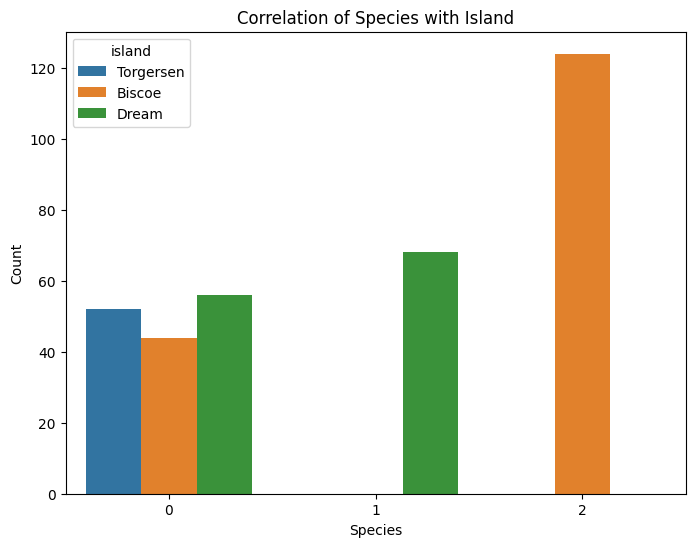

In [16]:
# Step 7:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', hue='island', data=df)
plt.title('Correlation of Species with Island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [17]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [18]:
# Step 8:
data_encoded = pd.get_dummies(df, columns=['species', 'island', 'sex'])
data_encoded.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_0,species_1,species_2,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,1,0,0,0,0,1,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,0,1,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,0,1,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,0,1,0,0,0
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,0,1,0,1,0


In [19]:
# Step 9:
X = data_encoded.drop(columns=['species_0', 'species_1', 'species_2'])
y = data_encoded[['species_0', 'species_1', 'species_2']]

In [20]:
# Step 10:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Step 11:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Step 12:
print("Training data shape (X):", X_train.shape, " y:", y_train.shape)
print("Testing data shape (X):", X_test.shape, " y:", y_test.shape)

Training data shape (X): (275, 10)  y: (275, 3)
Testing data shape (X): (69, 10)  y: (69, 3)
